Carlos Fernández de la Torre
# Trabajo 2: Aspectos prácticos de las redes neuronales

En este segundo trabajo, vamos a continuar desarrollando el problema de Fashion MNIST, con el objetivo de entender los aspectos prácticos del entrenamiento de redes neuronales que hemos visto en el Tema 4.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**.

In [2]:
# Puedes añadir todos los imports adicionales que necesites aquí
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt

from keras import regularizers

#### Obtención de los datos y pre-processing

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

## Consideraciones iniciales

### Train-validation-test split

En todos los modelos que entrenemos, vamos a partir los datos de training (x_train) en dos sets: training y validación. De este modo, al final tendremos tres datasets distintos: training, validation, y test. Esta es una estrategia común en el aprendizaje automático, en la que los datos de test (o held-out data) se
"esconden" hasta el final. Los datos de validación se utilizan para estimar cómo de bien están funcionando nuestros modelos y para observar si estamos cayendo en overfitting. Esto nos permite cambiar hiperparámetros y probar distintas arquitecturas **sabiendo que no estamos utilizando información del test set para "optimizar" los resultados en éste** (si eligiéramos nuestro mejor modelo en base a los resultados de test, estaríamos "haciendo trampas", ya que se ha utilizado la información contenida en éste para elegir el modelo y las métricas reportadas serían optimistas).

Para utilizar un split training-validation data durante el entrenamiento, podemos partir nosotros mismos los datos o dejar que Keras lo haga. Podéis ver cómo hacer estas particiones en la documentación de *fit*.

#### **Requisito: En todos los entrenamientos de esta práctica, se requiere utilizar el 20% de los datos en x_train como  conjunto de datos de validación **

### Un error común con modelos de Keras

En esta práctica entrenaremos varios modelos para comparar resultados. Un error común en Keras es no instanciar un nuevo modelo cada vez que hacemos un nuevo entrenamiento. Al hacer

*model = Sequential()*

*model.add(lo que sea)  # Definición del modelo*

*model.fit()*

si queremos entrenar un nuevo modelo o el mismo modelo otra vez, es necesario volver a inicializar el modelo con model = Sequential(). Si olvidamos este paso y volvemos a hacer fit(), el modelo seguirá entrenando por donde se quedó en el último fit().

### Análisis de resultados

A la hora de escribir las respuestas y los análisis pedidos, es importante presentar las conclusiones de manera adecuada a partir de lo visto en nuestros experimentos. Los Jupyter Notebook son una herramienta imprescindible para *data scientists* e ingenieros de Machine Learning para presentar los resultados, incluyendo soporte para incluir gráficas y elementos visuales. Podéis explicar vuestras observaciones del modo que consideréis adecuado, si bien recomendamos la utilización de gráficas para evaluar los entrenamientos y comparar resultados.

Como ayuda, las siguientes funciones pueden resultar interesantes a la hora de evaluar resultados. Todas ellas utilizan el objeto *history* que podéis obtener como salida del método *fit()* de Keras:

history = model.fit(x_train, y_train, ...)

Por supuesto, podéis modificarlas y utilizarlas como prefiráis para crear vuestros propios informes.

In [4]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()

def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1,
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()

def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['accuracy'], color="green")
    plt.plot(history1.history['val_accuracy'], 'r--', color="green")
    plt.plot(history2.history['accuracy'], color="blue")
    plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1,
                'Train ' + name2, 'Val ' + name2],
               loc='lower right')
    plt.show()

# Nota: podéis cambiar los números aquí presentes y ejecutar esta línea si queréis cambiar el tamaño
# de las gráficas
# matplotlib.rcParams['figure.figsize'] = [8, 8]


## 1. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 1**: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [5]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

# SIGMOID
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128, activation='sigmoid'),
keras.layers.Dense(64, activation='sigmoid'),
keras.layers.Dense(10, activation='softmax')
])
model.summary()
model.compile(optimizer='sgd',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=5, validation_split = 0.2)

# ReLU
model2 = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(64, activation='relu'),
keras.layers.Dense(10, activation='softmax')
])
model2.summary()
model2.compile(optimizer='sgd',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history2=model2.fit(x_train, y_train, epochs=5, validation_split = 0.2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 3s 1ms/step - loss: 2.0905 - accuracy: 0.4036 - val_loss: 1.7703 - val_accuracy: 0.5504
Epoch

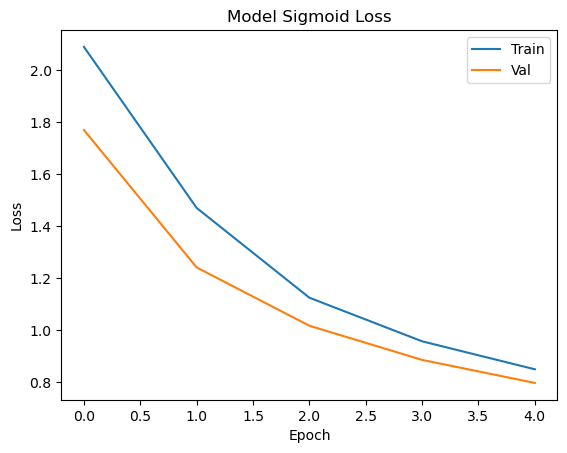

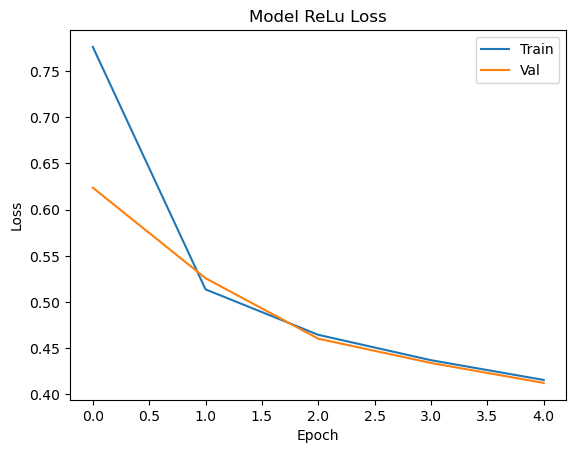

C:\Users\NestorBD\AppData\Local\Temp\ipykernel_15832\655699789.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(history1.history['val_accuracy'], 'r--', color="green")
C:\Users\NestorBD\AppData\Local\Temp\ipykernel_15832\655699789.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(history2.history['val_accuracy'], 'r--', color="blue")


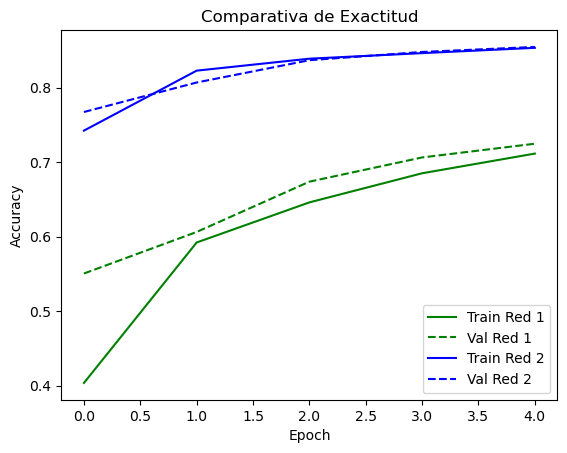

In [6]:
plot_loss(history, title="Model Sigmoid Loss")
plot_loss(history2, title="Model ReLu Loss")
plot_compare_accs(history, history2, name1="Red 1",
                      name2="Red 2", title="Comparativa de Exactitud")


## <font color='green'>Respuesta Ejercicio 1. Análisis comparativo entre modelos con unidades de activación Sigmoid y ReLU </font>

- <font color='green'> Según vemos comparando las dos primeras gráficas el modelo con unidades ReLu aprende más rápido al reducirse con mayor pendiente la función de coste con los datos de entrenamiento. </font>
  
- <font color='green'> Observando la grafica *comparativa de exactitud* el accuracy es también mejor tanto en los datos de entrenamiento como en los de validación en el modelo que usa unidades ReLu.  </font>

- <font color='green'> Las diferencias en velocidad de convergencia entre modelos puede producirse debido a la saturación de las unidades sigmoid (muerte de gradientes) ralentizando el aprendizaje y obteniendo menor exactitud.
</font>

## 2. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 2**: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [7]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto
# -------------------------------------------------------------------------
# Inicialización con ceros
#keras.initializers.Zeros()
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128,activation='relu',kernel_initializer='zeros',
                bias_initializer='zeros'),
keras.layers.Dense(64,activation='relu',kernel_initializer='zeros',
                bias_initializer='zeros'),
keras.layers.Dense(10, activation='softmax',kernel_initializer='zeros',
                bias_initializer='zeros')
])
#model.summary()
model.compile(optimizer='sgd',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=5, validation_split = 0.2)
# -------------------------------------------------------------------------


Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3027 - val_accuracy: 0.0995
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.0957


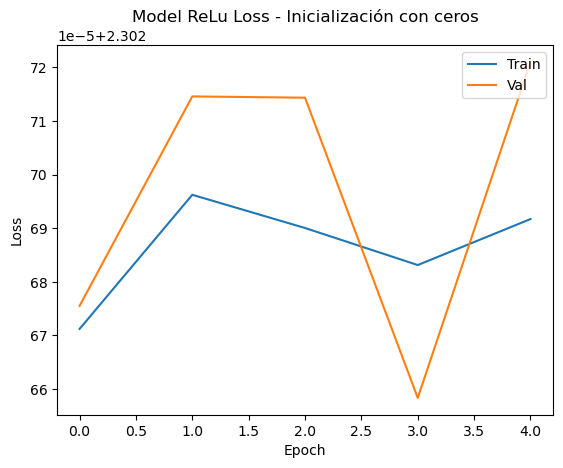

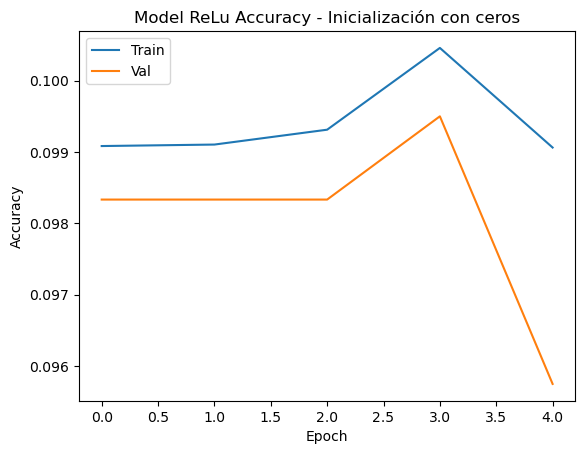

In [8]:
plot_loss(history, title="Model ReLu Loss - Inicialización con ceros")
plot_acc(history, title="Model ReLu Accuracy - Inicialización con ceros")

## <font color="green">Respuesta Ejercicio 2.1). Inicialización de weights y bias con ceros. </font>
- <font color="green">El modelo no aprende vemos en la gráfica que el loss en los datos de train es prácticamente horizontal. </font>

In [9]:
#Inicialización con una variable aleatoria normal
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
model2 = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128,activation='relu',kernel_initializer='random_uniform',
                bias_initializer='zeros'),
keras.layers.Dense(64,activation='relu',kernel_initializer='random_uniform',
                bias_initializer='zeros'),
keras.layers.Dense(10, activation='softmax',kernel_initializer='random_uniform',
                bias_initializer='zeros')
])
#model2.summary()
model2.compile(optimizer='sgd',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history2=model2.fit(x_train, y_train, epochs=5, validation_split = 0.2)
# -------------------------------------------------------------------------


Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 1.5662 - accuracy: 0.4418 - val_loss: 0.8828 - val_accuracy: 0.6388
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7610 - accuracy: 0.7115 - val_loss: 0.6722 - val_accuracy: 0.7585
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6354 - accuracy: 0.7711 - val_loss: 0.5919 - val_accuracy: 0.7834
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5658 - accuracy: 0.8023 - val_loss: 0.5432 - val_accuracy: 0.8088
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5204 - accuracy: 0.8172 - val_loss: 0.4997 - val_accuracy: 0.8286


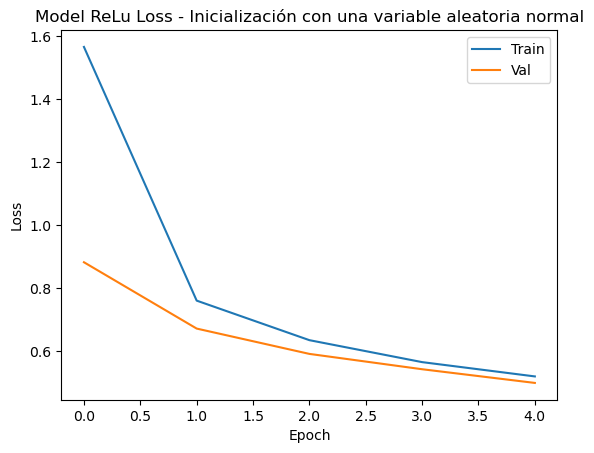

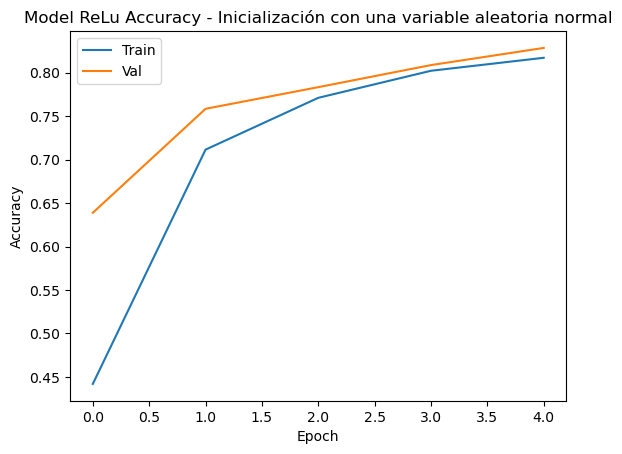

In [10]:
plot_loss(history2, title="Model ReLu Loss - Inicialización con una variable aleatoria normal")
plot_acc(history2, title="Model ReLu Accuracy - Inicialización con una variable aleatoria normal")

## <font color="green">Respuesta Ejercicio 2.2).Inicialización de weights y bias con una variable aleatoria normal. </font>
- <font color="green">El modelo aprende rápido y no se produce overfiting vemos en la gráfica que el loss en los datos de train desciende de forma abrupta tanto en los datos de train como en los de validación la exactitud ronda el 80 por ciento. </font>

In [11]:
# Estrategia glorot uniform
keras.initializers.glorot_normal(seed=None)
model3 = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128,activation='relu',kernel_initializer='glorot_normal',
                bias_initializer='zeros'),
keras.layers.Dense(64,activation='relu',kernel_initializer='glorot_normal',
                bias_initializer='zeros'),
keras.layers.Dense(10, activation='softmax',kernel_initializer='glorot_normal',
                bias_initializer='zeros')
])
#model3.summary()
model3.compile(optimizer='sgd',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history3=model3.fit(x_train, y_train, epochs=5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7713 - accuracy: 0.7459 - val_loss: 0.5743 - val_accuracy: 0.8025
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5094 - accuracy: 0.8249 - val_loss: 0.4928 - val_accuracy: 0.8253
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4634 - accuracy: 0.8379 - val_loss: 0.4898 - val_accuracy: 0.8207
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4363 - accuracy: 0.8474 - val_loss: 0.4246 - val_accuracy: 0.8538
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4142 - accuracy: 0.8537 - val_loss: 0.4262 - val_accuracy: 0.8486


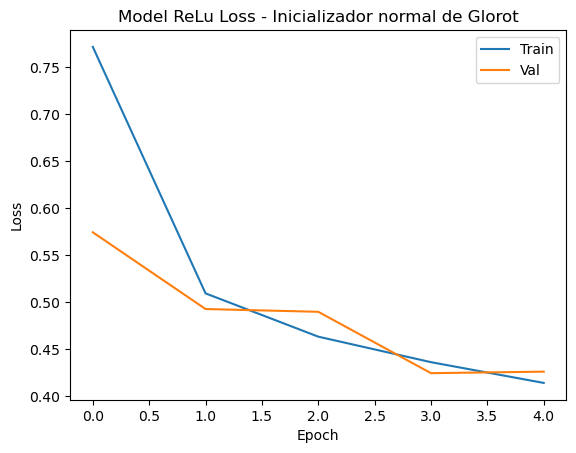

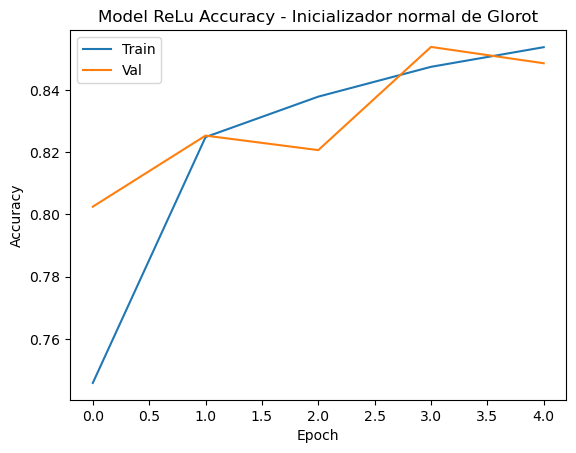

C:\Users\NestorBD\AppData\Local\Temp\ipykernel_15832\655699789.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(history1.history['val_loss'], 'r--', color="green")
C:\Users\NestorBD\AppData\Local\Temp\ipykernel_15832\655699789.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(history2.history['val_loss'], 'r--', color="blue")


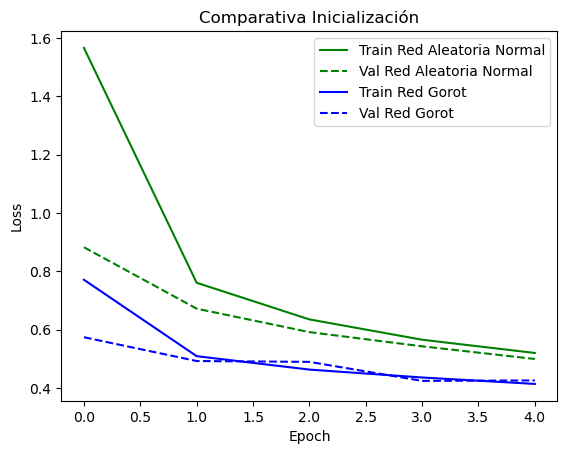

C:\Users\NestorBD\AppData\Local\Temp\ipykernel_15832\655699789.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(history1.history['val_accuracy'], 'r--', color="green")
C:\Users\NestorBD\AppData\Local\Temp\ipykernel_15832\655699789.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(history2.history['val_accuracy'], 'r--', color="blue")


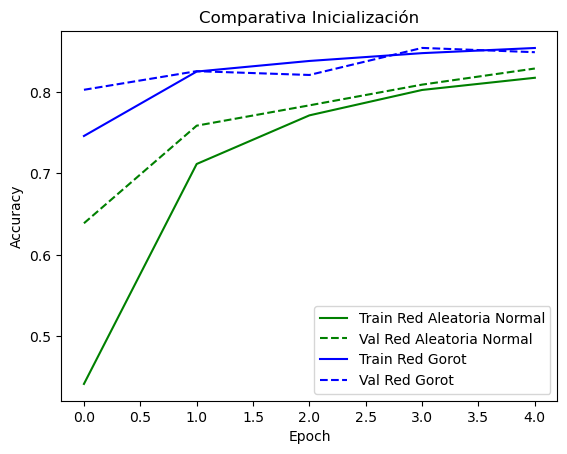

In [12]:
plot_loss(history3, title="Model ReLu Loss - Inicializador normal de Glorot")
plot_acc(history3, title="Model ReLu Accuracy - Inicializador normal de Glorot")
plot_compare_losses(history2, history3, name1="Red Aleatoria Normal",
                        name2="Red Gorot", title="Comparativa Inicialización")
plot_compare_accs(history2, history3, name1="Red Aleatoria Normal",
                        name2="Red Gorot", title="Comparativa Inicialización")

## <font color="green">Respuesta Ejercicio 2.3).Inicialización de weights y bias mediante el inicializador normal de Glorot, también llamado inicializador normal de Xavier. </font>
- <font color="green">Al igual que en el modelo en el que se inicializaron los pesos y sesgos de las capas con una variable aleatoria normal (modelo 2), el modelo 3 aprende rápido y no se produce overfiting, vemos en la gráfica que el loss en los datos de train desciende de forma abrupta tanto en los datos de train como en los de validación la exactitud también ronda el 80 por ciento. </font>
- <font color="green"> La principal diferencia con respecto al modelo 2 es que el loss inicial es menor usando la inicialización normal de Gorot pudiéndonos ahorrar una época de aprendizaje y obtener resultados similares, en la gráfica comparativa de Loss vemos que el modelo 2 en verde necesita una epoch para alcanzar 0.8 de loss mientras el modelo 3 en azul comienza con 0.8 de loss. </font>





## 3. Optimizadores

**Ejercicio 3**: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

In [13]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto
# ReLU
keras.initializers.glorot_normal(seed=None)
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128,activation='relu',kernel_initializer='glorot_normal',
                bias_initializer='zeros'),
keras.layers.Dense(64,activation='relu',kernel_initializer='glorot_normal',
                bias_initializer='zeros'),
keras.layers.Dense(10, activation='softmax',kernel_initializer='glorot_normal',
                bias_initializer='zeros')
])
model.summary()
#model.compile(optimizer='sgd',
#model.compile(optimizer='RMSprop',
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=5, validation_split = 0.2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5145 - accuracy: 0.8189 - val_loss: 0.4141 - val_accuracy: 0.8496
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3790 - accuracy: 0.8619 - val_loss: 0.3669 - val_accuracy: 0.8652
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3405 - accuracy: 0.8747 - val_loss: 0.3614 - val_accuracy: 0.8689
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3177 - accuracy: 0.8829 - val_loss: 0.3579 - val_accuracy: 0.8712
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2972 - accuracy: 0.8896 - val_loss: 0.3298 - val_accuracy: 0.8800


C:\Users\NestorBD\AppData\Local\Temp\ipykernel_15832\655699789.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(history1.history['val_loss'], 'r--', color="green")
C:\Users\NestorBD\AppData\Local\Temp\ipykernel_15832\655699789.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(history2.history['val_loss'], 'r--', color="blue")


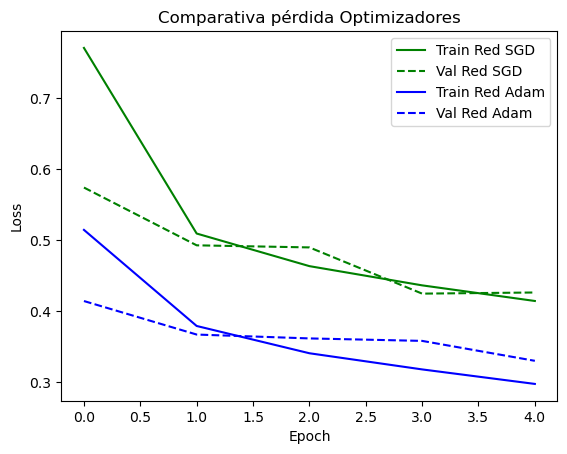

C:\Users\NestorBD\AppData\Local\Temp\ipykernel_15832\655699789.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(history1.history['val_accuracy'], 'r--', color="green")
C:\Users\NestorBD\AppData\Local\Temp\ipykernel_15832\655699789.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(history2.history['val_accuracy'], 'r--', color="blue")


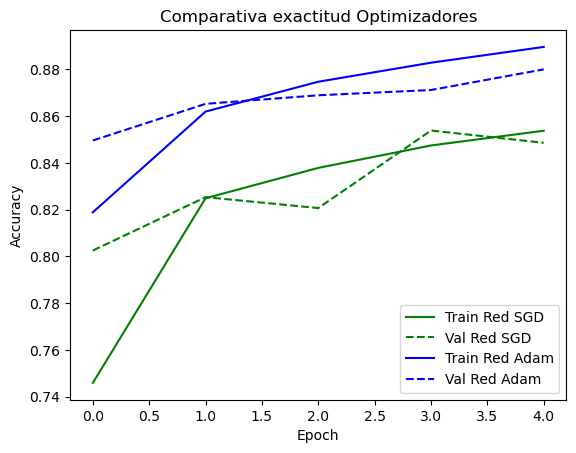

In [14]:
plot_compare_losses(history3, history, name1="Red SGD",
                        name2="Red Adam", title="Comparativa pérdida Optimizadores")

plot_compare_accs(history3, history, name1="Red SGD",
                      name2="Red Adam", title="Comparativa exactitud Optimizadores")


## <font color="green">Respuesta Ejercicio 3. Optimizadores </font>
- <font color="green">Observando la gráfica vemos que pese a estar inicializados los pesos y sesgos de igual manera en los dos modelos, el modelo que usa el optimizador Adam con una sola época de aprendizaje ya es mejor (la pérdida y la exactitud), que el que usa SGD como optimizador.</font>

## 4. Regularización y red final

**Ejercicio 4.1**: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

In [15]:
## Tu modelo y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto
from keras import regularizers

# ReLU
keras.initializers.glorot_normal(seed=None)
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128,activation='relu',kernel_initializer='glorot_normal',
                bias_initializer='zeros',input_dim=128,
                kernel_regularizer=regularizers.l2(0.00001),
                activity_regularizer=regularizers.l1(0.00001)),
keras.layers.Dense(64,activation='relu',kernel_initializer='glorot_normal',
                bias_initializer='zeros',input_dim=64,
                kernel_regularizer=regularizers.l2(0.00001),
                activity_regularizer=regularizers.l1(0.00001)),
keras.layers.Dense(10, activation='softmax',kernel_initializer='glorot_normal',
                bias_initializer='zeros',input_dim=10,
                kernel_regularizer=regularizers.l2(0.00001),
                activity_regularizer=regularizers.l1(0.00001))
])
model.summary()
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=5, validation_split = 0.2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 10)                650       


                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5139 - accuracy: 0.8189 - val_loss: 0.4113 - val_accuracy: 0.8550
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3839 - accuracy: 0.8615 - val_loss: 0.3687 - val_accuracy: 0.8692
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3495 - accuracy: 0.8729 - val_loss: 0.3811 - val_accuracy: 0.8636
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3247 - accuracy: 0.8835 - val_loss: 0.3582 - val_accuracy: 0.8743
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3087 - accuracy: 0.8886 - val_loss: 0.3553 - val_accuracy: 0.8743


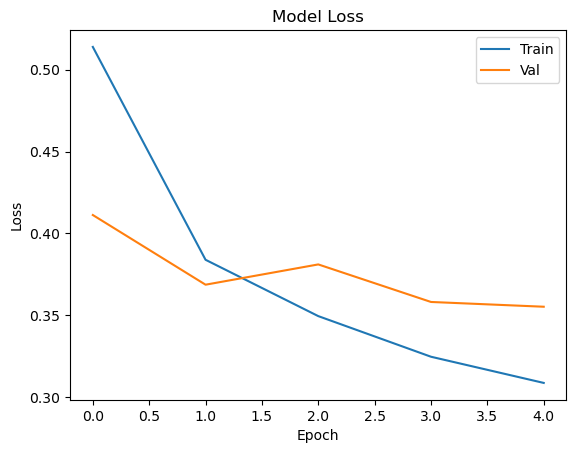

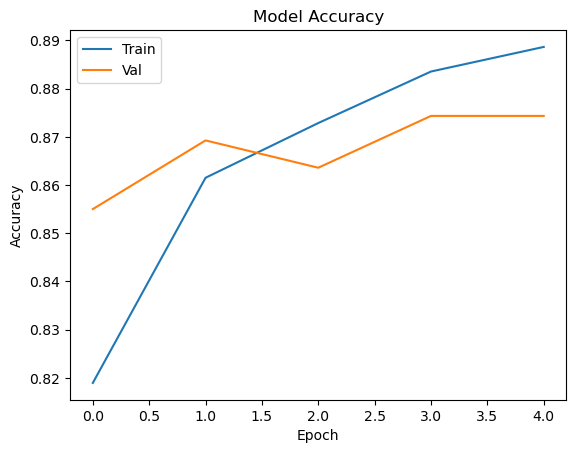

In [16]:
plot_loss(history, title="Model Loss")
plot_acc(history, title="Model Accuracy")

## <font color="green">Respuesta Ejercicio 4.1. Regularización  </font>
- <font color="green">Observando la gráfica de Loss vemos que tras la segunda época la red cae en overfiting por lo que entrenaríamos el modelo únicamente durante dos épocas. </font>
- <font color="green"> Por otro lado viendo la gráfica de exactitud observamos que en la época 2 antes de caer enn overfiting la red alcanza una exactitud superior al 87 por ciento tanto en los datos de training como en los de validación. </font>

### Evaluación del modelo en datos de test

Una vez elegido el que creemos que es nuestro mejor modelo a partir de la estimación que hemos visto en los datos de validación, es hora de utilizar los datos de test para ver cómo se comporta nuestro modelo ante nuevos datos. Si hemos hecho bien las cosas, este número debería ser parecido al valor de nuestra estimación vista en los datos de validación.

**Pregunta 4.2**. Utilizando nuestro mejor modelo, obtener la accuracy resultante en el dataset de test. Comentar este resultado.

In [17]:
## Tu código y comentarios de texto aquí

keras.initializers.glorot_normal(seed=None)
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128,activation='relu',kernel_initializer='glorot_normal',
                bias_initializer='zeros',input_dim=128,
                kernel_regularizer=regularizers.l2(0.00001),
                activity_regularizer=regularizers.l1(0.00001)),
keras.layers.Dense(64,activation='relu',kernel_initializer='glorot_normal',
                bias_initializer='zeros',input_dim=64,
                kernel_regularizer=regularizers.l2(0.00001),
                activity_regularizer=regularizers.l1(0.00001)),
keras.layers.Dense(10, activation='softmax',kernel_initializer='glorot_normal',
                bias_initializer='zeros',input_dim=10,
                kernel_regularizer=regularizers.l2(0.00001),
                activity_regularizer=regularizers.l1(0.00001))
])
model.summary()
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=3, validation_split = 0.2)

score=model.evaluate(x_test,y_test,verbose=0)
print("Test loss:", score[0])
print("Test accuracy:",score[1])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 


Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/3
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5187 - accuracy: 0.8152 - val_loss: 0.4171 - val_accuracy: 0.8508
Epoch 2/3
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3812 - accuracy: 0.8625 - val_loss: 0.3794 - val_accuracy: 0.8650
Epoch 3/3
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3438 - accuracy: 0.8758 - val_loss: 0.3622 - val_accuracy: 0.8739
Test loss: 0.39521604776382446
Test accuracy: 0.8634999990463257


## <font color="green">Respuesta Ejercicio 4.2. Exactitud con dataset de test  </font>
- <font color="green">Observamos que usando solo dos épocas de aprendizaje se alcanza en los datos de test una exactitud del 86 por ciento, similar a la alcanzada con los datos de validación.